In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix
import missingno as mns
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re 
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
df = pd.read_csv('Tweets.csv')

In [38]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: >

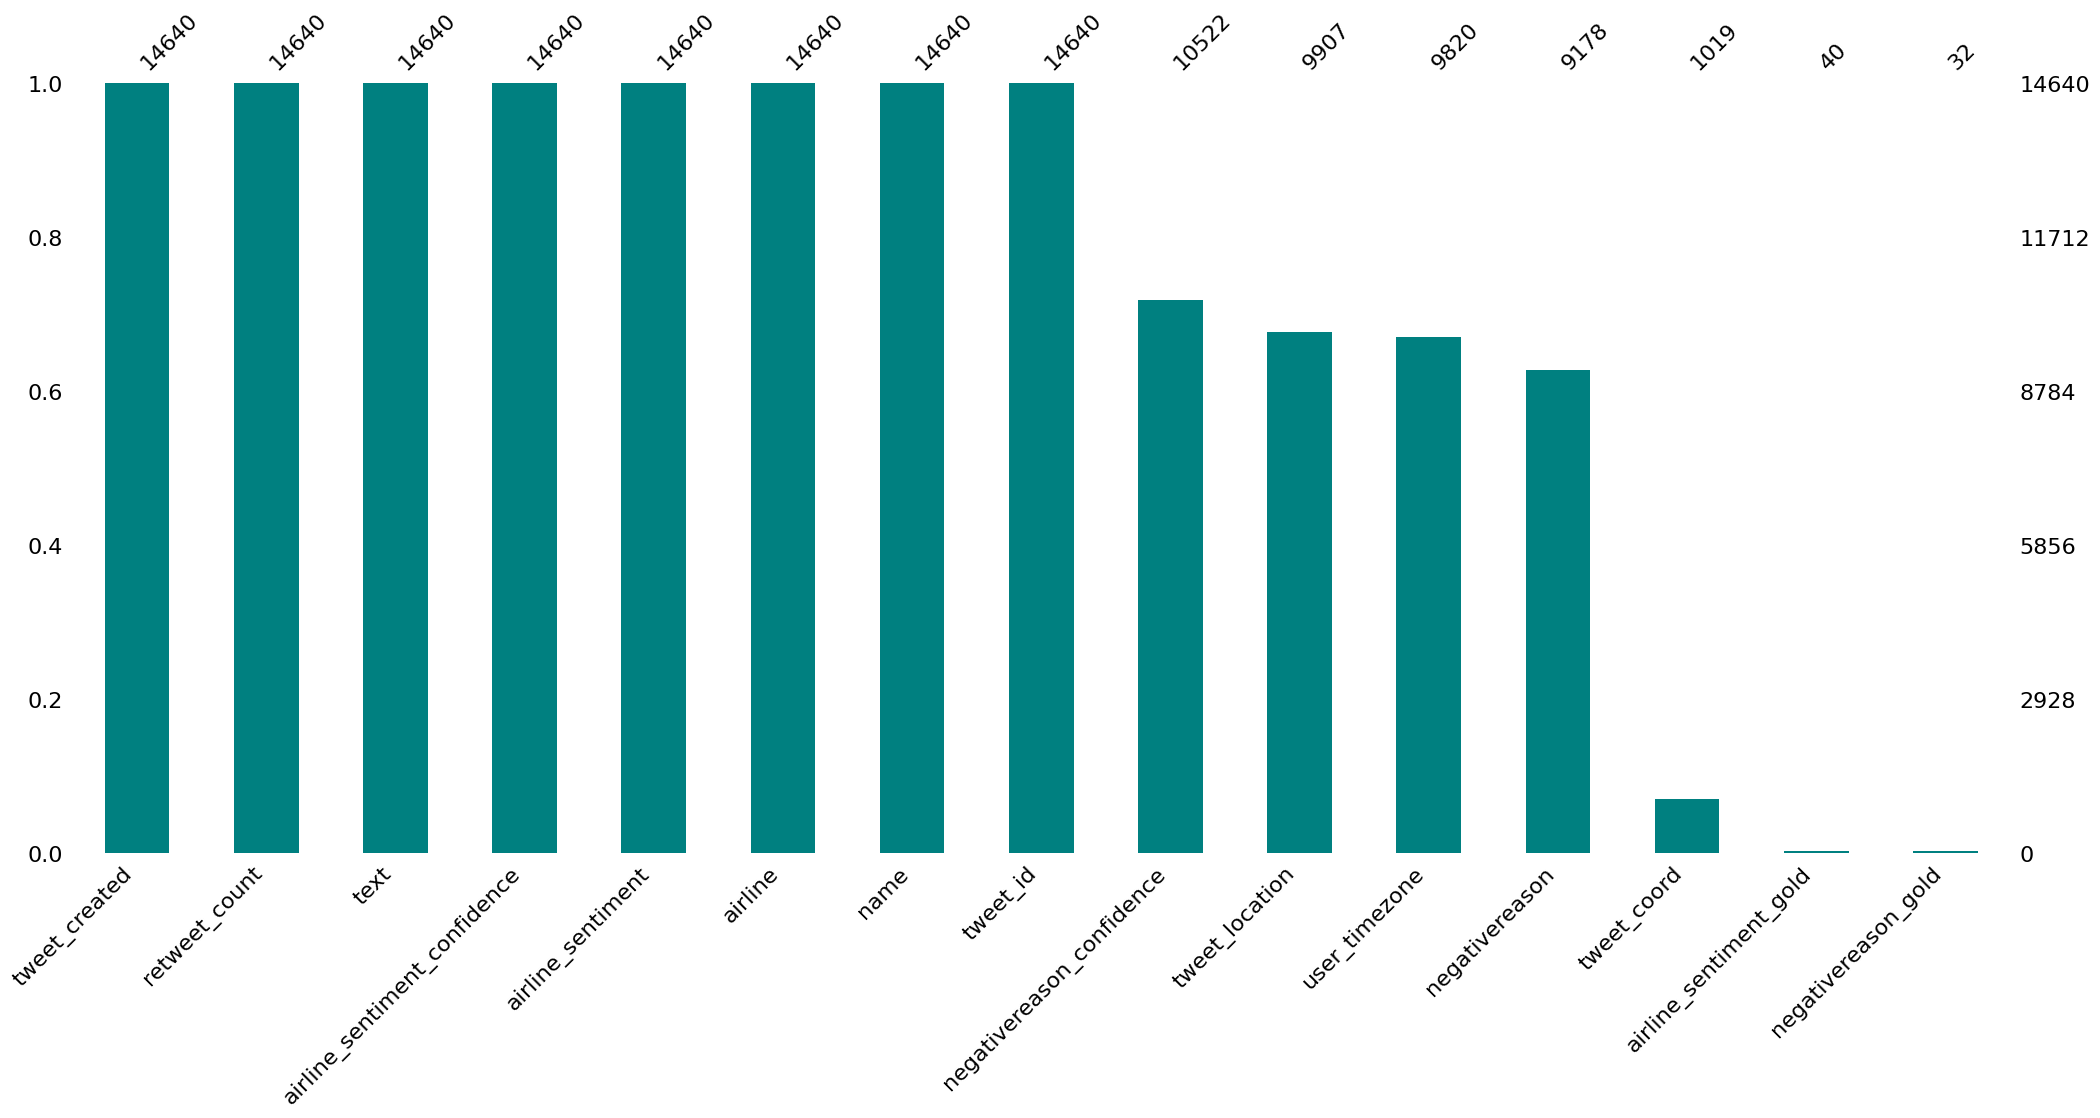

In [39]:
mns.bar(df, color = 'teal', sort= 'descending')

In [40]:
fig = px.histogram(x = df['airline'], text_auto=True, color = df['negativereason'])
fig.show()

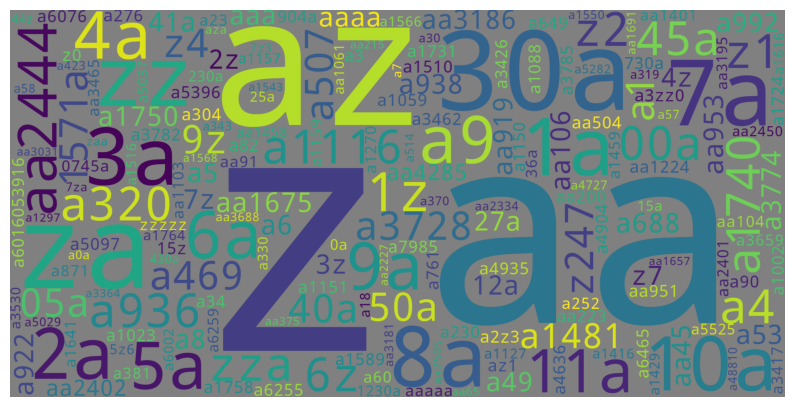

In [56]:
newdata = df[df['airline_sentiment'] =='negative']
words = " ".join(newdata['text'])
clw = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])
wc = WordCloud(stopwords=STOPWORDS, background_color='grey', width=2000,height=1000).generate(clw)
plt.figure(1, figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()


In [43]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [44]:

from sklearn.utils import resample
df_neg = df[df['airline_sentiment'] == 'negative']
df_pos = df[df['airline_sentiment'] == 'positive']
df_nue = df[df['airline_sentiment'] == 'neutral']
def_nue_sam = resample(df_nue, n_samples=9178)
def_pos_sam = resample(df_pos, n_samples=9178)
df = pd.concat([df_neg, def_nue_sam, def_pos_sam],ignore_index=True)
df = df.sample(frac= 1)
df['airline_sentiment'].value_counts()


airline_sentiment
positive    9178
neutral     9178
negative    9178
Name: count, dtype: int64

In [45]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re 
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


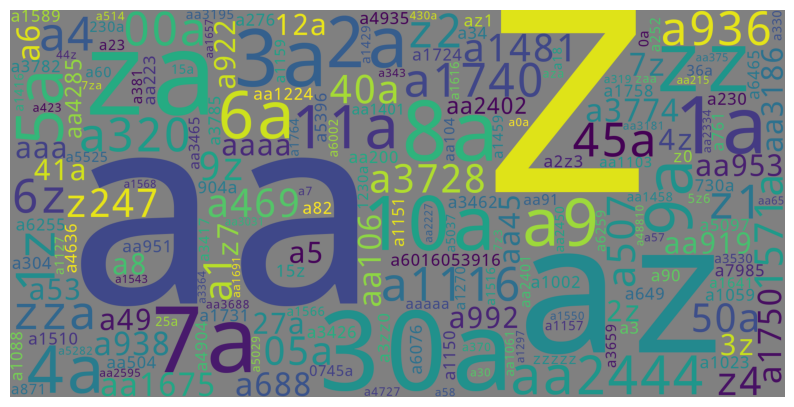

In [57]:
newdata = df[df['airline_sentiment'] =='negative']
words = " ".join(newdata['text'])
clw = " ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])
wc = WordCloud(stopwords=STOPWORDS, background_color='grey', width=2000,height=1000).generate(clw)
plt.figure(1, figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [46]:
text_cleaning_re = "@\S+|https?:\S+https?:\s|[^A-Zaz0-9]+"
def preprocess(x, stem = False):
    x = re.sub(text_cleaning_re, " ", str(x).lower()).strip()
    tokens = []
    for token in x.split():
        if token not in stop_words:
            if stem:
                tokens.append(SnowballStemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)
df['text']= df['text'].apply(lambda x:preprocess(x))

<>:1: SyntaxWarning:

invalid escape sequence '\S'

<>:1: SyntaxWarning:

invalid escape sequence '\S'

C:\Users\USER\AppData\Local\Temp\ipykernel_10712\3497848844.py:1: SyntaxWarning:

invalid escape sequence '\S'



In [47]:
x = df.text
y = df['airline_sentiment']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)
from sklearn.pipeline import Pipeline
clf1 = Pipeline([('vectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('model',MultinomialNB())])
clf2 = Pipeline([('vectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('model',BernoulliNB())])
clf3 = Pipeline([('vectorizer', CountVectorizer()), ('transformer', TfidfTransformer()), ('model',MLPClassifier(hidden_layer_sizes=(10,10)))])

In [48]:
clf1.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('transformer', TfidfTransformer()),
                ('model', MultinomialNB())])

In [49]:
pred1 = clf1.predict(xtest)
print(classification_report(ytest,pred1))

              precision    recall  f1-score   support

    negative       0.66      0.17      0.27      1887
     neutral       0.34      0.90      0.49      1767
    positive       0.68      0.14      0.23      1853

    accuracy                           0.39      5507
   macro avg       0.56      0.40      0.33      5507
weighted avg       0.56      0.39      0.33      5507



In [50]:
clf2.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('transformer', TfidfTransformer()), ('model', BernoulliNB())])

In [51]:

pred2 = clf2.predict(xtest)
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

    negative       0.64      0.17      0.27      1887
     neutral       0.64      0.19      0.29      1767
    positive       0.39      0.94      0.55      1853

    accuracy                           0.43      5507
   macro avg       0.56      0.43      0.37      5507
weighted avg       0.56      0.43      0.37      5507



In [52]:
clf3.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('transformer', TfidfTransformer()),
                ('model', MLPClassifier(hidden_layer_sizes=(10, 10)))])

In [53]:
pred3 = clf3.predict(xtest)
print(classification_report(ytest,pred3))

              precision    recall  f1-score   support

    negative       0.69      0.17      0.28      1887
     neutral       0.69      0.22      0.34      1767
    positive       0.39      0.94      0.55      1853

    accuracy                           0.45      5507
   macro avg       0.59      0.45      0.39      5507
weighted avg       0.59      0.45      0.39      5507



In [54]:
from sklearn.model_selection import GridSearchCV
param_grid1 = {
    'vectorizer__max_df' :[0.75,1.0],
    'vectorizer__min_df' :[1,3],
    'transformer__use_idf':[True,False],
    'model__alpha':[0.1,1.0]
}
param_grid2 = {
    'vectorizer__max_df' :[0.75,1.0],
    'vectorizer__min_df' :[1,3],
    'transformer__use_idf':[True,False],
    'model__alpha':[0.1,1.0]
}
param_grid3 = {
    'vectorizer__max_df' :[0.75,1.0],
    'vectorizer__min_df' :[1,3],
    'transformer__use_idf':[True,False],
    'model__hidden_layer_sizes':[(10,10),(20,20)],
    'model__activation':['relu', 'identity', 'logistic', 'tanh'],
    'model__solver':['lbfgs', 'sgd', 'adam']
}
pipelines = [clf1,clf2,clf3]
param_grids = [param_grid1,param_grid2,param_grid3]
best_estimators = []
for i, (pipelines,param_grids) in enumerate(zip(pipelines,param_grids)):
    grid_search = GridSearchCV(pipelines,param_grids,cv=5, scoring='accuracy',n_jobs=-1)
    grid_search.fit(xtrain,ytrain)
    print(f'Best parameters for clf{i+1}: {grid_search.best_params_}')
    print(f'Best cross validation score for clf {i+1}: {grid_search.best_score_}') 
    best_estimators.append(grid_search.best_estimator_)


Best parameters for clf1: {'model__alpha': 0.1, 'transformer__use_idf': True, 'vectorizer__max_df': 0.75, 'vectorizer__min_df': 1}
Best cross validation score for clf 1: 0.4084079443829305
Best parameters for clf2: {'model__alpha': 0.1, 'transformer__use_idf': True, 'vectorizer__max_df': 0.75, 'vectorizer__min_df': 1}
Best cross validation score for clf 2: 0.42602273342047764


KeyboardInterrupt: 